In [ ]:
import tensorflow as tf
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [1]:
from cnn import LFV_CNN
from dataset_master import DatasetMaster

2024-04-28 03:11:33.360488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 03:11:34.677743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/CNNenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a = DatasetMaster()
a.master_df.head()

Found: 3675 songs between the train_triplets and the million song dataset
Found: 2363 songs between the free music archive (full track list), train_triplets and the million song dataset
Found: 167 songs between the free music archive (audio samples), train_triplets and the million song dataset


/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/dataset_master.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  master_df = pd.concat([master_df, pd.DataFrame([row])])


,track_id,track_title,artist_name_x,play_count,index_into_fma_track_df,artist_name_y
18,SOJEVZW12A8C133988,waiting,porcupine tree,0.825174,85957,pete galub
21,SOJEVZW12A8C133988,waiting,porcupine tree,0.825174,116547,andrew howes
24,SOJEVZW12A8C133988,waiting,porcupine tree,0.825174,131904,david szesztay
43,SODTRPJ12A8C1377E9,oh my god,sticky fingaz,0.636287,137054,sbj
135,SOGDBUF12A8C140FAA,intro,40 grit,0.427447,92947,muhmood


In [ ]:
if 5 < 0.8 * 9:
    print("hi")

In [ ]:
mil = a.df_million_song.to_numpy()
lfv = a.WMF.get_item_vectors()
master = a.master_df.to_numpy()

print(f"{mil.shape = } and {master.shape = }")
print(mil[:5])
print(a.df_million_song.head())

In [ ]:
import numpy as np

print(a.df_million_song.tail())
print(a.df_million_song.index[a.df_million_song['track_id']=='SOHKNRJ12A6701D1F8'])
count = 0
for song in a.master_df.iterrows():
    # print(song)
    index_into_fma_track_df = song[1]['index_into_fma_track_df']
    train_data = a.create_mel_spectrogram(a.find_fma_song(index_into_fma_track_df), offset=np.random.randint(0,26), duration=3)
        
#     index_into_TT = a.df_million_song.index(a.df_million_song[song['track_id']])
    for index, mil_song in enumerate(mil):
        if mil_song[0] == song[1]['track_id'] and mil_song[1] == song[1]['track_title']:
            print(f"{index = } {mil_song}")
            index_into_TT = index
            count += 1
    # print(mil[mil[0] == song[1]['track_id']])
    # print(song[1].iloc[0])
    # print(a.df_million_song.index[a.df_million_song['track_id']==song[1].iloc[0]])
                

In [5]:
CNN_Model = LFV_CNN()

/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/CNNenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-28 03:12:05.791497: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1814 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
for index, item in enumerate(a.CNN_Train_Data[2]):
    print(f"Shape of item {index}: {np.array(item).shape}")
    
np.array(a.CNN_Train_Data[2])

NameError: name 'np' is not defined

I0000 00:00:1714291969.887120   52225 service.cc:145] XLA service 0x704b68003c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714291969.887161   52225 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-28 03:12:49.955572: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-28 03:12:50.364423: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0182 - loss: -19.3187

I0000 00:00:1714291977.089149   52225 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.0176 - loss: -28.9044Epoch 1: Validation Loss: -104.41465759277344
logs = {'accuracy': 0.015037594363093376, 'loss': -67.24725341796875, 'val_accuracy': 0.0357142873108387, 'val_loss': -104.41465759277344}
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 972ms/step - accuracy: 0.0172 - loss: -35.2949 - val_accuracy: 0.0357 - val_loss: -104.4147


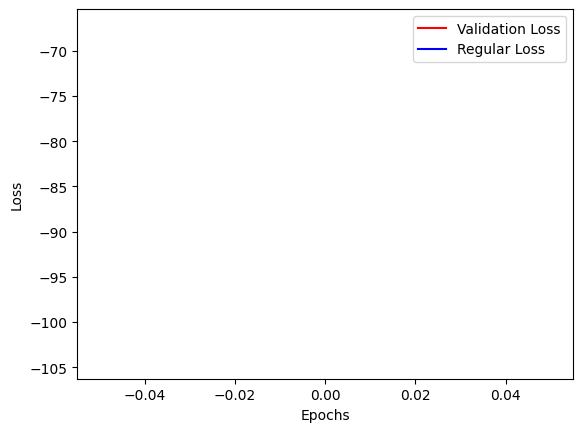

In [6]:
import numpy as np
CNN_Model.train(np.array(a.CNN_Train_Data[0]), np.array(a.CNN_Train_Data[1]), np.array(a.CNN_Train_Data[2]), np.array(a.CNN_Train_Data[3]))

In [ ]:
import pandas as pd
temp = a.get_filenames()
master_df = pd.DataFrame(columns=['track_id', 'track_title', 'artist_name_x', 'play_count', 'index_into_fma_track_df', 'artist_name_y'])
print(a.matched_tracks.columns)
for i, r in a.matched_tracks.iterrows():
    # print(f"{i = } and {r['index_into_fma_track_df'] = }")
    if i % 5 == 0:
        master_df = pd.concat([master_df, pd.DataFrame([r])])
        
print(master_df.head())